# Basic Rotation Gates

Single-qubit rotation gates.

A single qubit's state can be mapped to the Bloch sphere. Rotations around the three
axes are generated by the pauli matrices:
$$
R_a(\theta) = \exp(-i \theta / 2 \sigma_a)
$$
where $\sigma_a$ is one of the Pauli $X, Y, Z$ operators.

Since global phase is often irrelevant, practitioners can use an alternative phase convention
and define single qubit gates as the real-valued power of a Pauli operator:
$$
(\sigma_a)^t
$$
which can be multiplied by $e^{-i \pi t / 2}$ to recover the $R_a(t \pi)$ matrix.

In Qualtran, we provide `ZPowGate` and `Rz` for the two respective phase conventions, as well
as analogues for the X and Y axes.

Global phase becomes a relevant, relative phase when forming controlled gates. Indeed, the
`ZPowGate` is a controlled `GlobalPhase` operation. Whereas `ZPowGate` and `Rz` are the
same up to global phase, their controlled versions `CZPowGate` and `CRz` are different operations
with different costs.

#### General References
 - [Quantum Computation and Quantum Information](https://doi.org/10.1017/CBO9780511976667).
   Nielsen and Chuang. 2010. Section 4.2
 - [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016).
   Barenco et. al. 1995.

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ZPowGate`
Apply a power of the Pauli Z operator to a single qubit.

Given  `exponent` $t$, the unitary matrix of this gate is:
$$
Z^t =
\begin{bmatrix}
    1 & 0 \\
    0 & e^{i \pi t}
\end{bmatrix}
$$

This is an atomic bloq in Qualtran. For many architectures, you will likely need to
synthesize an arbitrary-angle rotation from a discrete gateset like Clifford+T. Please
see the references for more information.

#### Relationships
This gate differs by a global phase from the $R_Z$ gate. `ZPowGate(t)` equals
`Rz(angle=t*np.pi)` plus `GlobalPhase(t/2)`.

This gate is the controlled version of a global phase gate. `ZPowGate(t)` equals
`GlobalPhase(t).controlled()`.

`exponent=1` corresponds to `ZGate`, `exponent=0.5` to `SGate`, and `exponent=0.25` to
`TGate`.

#### Parameters
 - `exponent`: The exponent t in Z^t.
 - `eps`: The precision of the rotation. This parameter is for bookkeeping and does not affect e.g. the tensor representation of this gate. When synthesizing a rotation from a discrete gate set, you must fix a precision `eps`. 

#### Registers
 - `q`: The qubit. 

#### References
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/abs/1403.2975). Ross and Selinger. 2014.
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Bocharov et. al. 2014. Offers a small improvement in Cliffod+T synthesis.


In [2]:
from qualtran.bloqs.basic_gates import ZPowGate

### Example Instances

In [3]:
z_pow = ZPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([z_pow],
           ['`z_pow`'])

## `CZPowGate`
The controlled `ZPowGate`

The unitary matrix of `CZPowGate(exponent=t)` is:
$$
C[Z^t] =
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & e^{i \pi t} \\
\end{bmatrix}
$$

#### Relationships
This gate has the same unitary as `Controlled(ZPowGate)`. CZPowGate(exponent=1) corresponds
to a `CZ` gate.

#### Parameters
 - `exponent`: The exponent t in Z^t.
 - `eps`: The precision of the controlled rotation. This parameter is for bookkeeping and does not affect e.g. the tensor representation of this gate. When synthesizing a rotation from a discrete gate set, you must fix a precision `eps`. 

#### Registers
 - `q`: A shape=(2,) register of two qubits ordered. This is a symmetric gate. 

#### References
 - [Simulating chemistry efficiently on fault-tolerant quantum computers](https://arxiv.org/abs/1204.0567). Jones et. al. 2012. Figure 8.


In [5]:
from qualtran.bloqs.basic_gates import CZPowGate

### Example Instances

In [6]:
cz_pow = CZPowGate(exponent=0.123)

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([cz_pow],
           ['`cz_pow`'])

### Call Graph

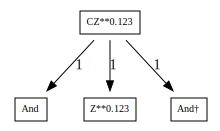

#### Counts totals:
 - `And`: 1
 - `And†`: 1
 - `Z**0.123`: 1

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
cz_pow_g, cz_pow_sigma = cz_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cz_pow_g)
show_counts_sigma(cz_pow_sigma)

### Decomposition

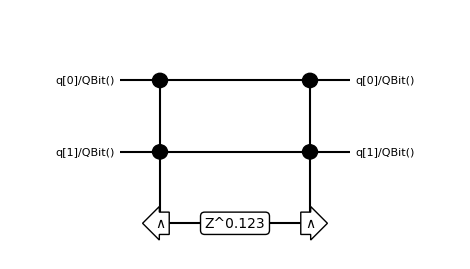

In [9]:
show_bloq(cz_pow.decompose_bloq(), 'musical_score')

## `Rz`
Apply a single-qubit Z rotation.

Given `angle` $\theta$, the unitary matrix of this gate is:
$$
R_Z(\theta) = \exp(-i \frac{\theta}{2} Z) =
\begin{bmatrix}
    e^{-i \theta/2} & 0 \\
    0 & e^{i \theta/2}
\end{bmatrix}
$$

This is an atomic bloq in Qualtran. For many architectures, you will likely need to
synthesize an arbitrary-angle rotation from a discrete gateset like Clifford+T. Please
see the references for more information.

#### Relationships
This gate differs by a global phase from the `Z^t` gate. `Rz(a)` equals
`ZPowGate(exponent=a/np.pi)` plus `GlobalPhase(-a/(2*np.pi))`.

#### Parameters
 - `angle`: The rotation angle in radians.
 - `eps`: The precision of the rotation. This parameter is for bookkeeping and does not affect e.g. the tensor representation of this gate. When synthesizing a rotation from a discrete gate set, you must fix a precision `eps`. 

#### Registers
 - `q`: One-bit register. 

#### References
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/abs/1403.2975). Ross and Selinger. 2014.
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Bocharov et. al. 2014. Offers a small improvement in Cliffod+T synthesis.


In [10]:
from qualtran.bloqs.basic_gates import Rz

### Example Instances

In [11]:
a = sympy.Symbol('a')
rz = Rz(a)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([rz],
           ['`rz`'])

## `CRz`
A controlled Rz rotation.

Given `angle` $\theta$, the unitary matrix of this gate is:
$$
C[R_Z(\theta)] =
\begin{bmatrix}
    1 & & &  \\
    & 1 & &  \\
    & & e^{-i \theta/2} &  \\
    & & &  e^{i \theta/2}
\end{bmatrix}
$$

#### Parameters
 - `angle`: The rotation angle in radians.
 - `eps`: The precision of the rotation. This parameter is for bookkeeping and does not affect e.g. the tensor representation of this gate. When synthesizing a rotation from a discrete gate set, you must fix a precision `eps`. 

#### Registers
 - `ctrl`: Whether the rotation is active.
 - `q`: The qubit on which we optionally perform the rotation. 

#### References
 - [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016). Barenco et al. 1995. Special case of Lemma 5.4.
 - [Is Controlled(Rz(theta)) more expensive than Controlled(Z^t) on the surface code?](https://quantumcomputing.stackexchange.com/a/40012). Adam Zalcman. 2024.


In [13]:
from qualtran.bloqs.basic_gates import CRz

### Example Instances

In [14]:
theta = sympy.Symbol(r'\theta')
crz = CRz(angle=theta)

#### Graphical Signature

In [15]:
from qualtran.drawing import show_bloqs
show_bloqs([crz],
           ['`crz`'])

### Call Graph

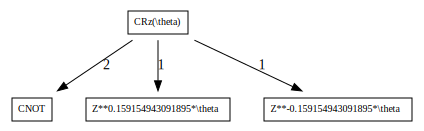

#### Counts totals:
 - `CNOT`: 2
 - `Z**-0.159154943091895*\theta`: 1
 - `Z**0.159154943091895*\theta`: 1

In [16]:
from qualtran.resource_counting.generalizers import ignore_split_join
crz_g, crz_sigma = crz.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(crz_g)
show_counts_sigma(crz_sigma)

### Decomposition

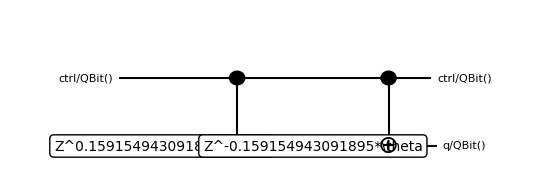

In [17]:
show_bloq(crz.decompose_bloq(), 'musical_score')

## `XPowGate`
A gate that rotates around the X axis of the Bloch sphere.

The unitary matrix of `XPowGate(exponent=t, global_shift=s)` is:
$$
e^{i \pi t (s + 1/2)}
\begin{bmatrix}
  \cos(\pi t /2) & -i \sin(\pi t /2) \\
  -i \sin(\pi t /2) & \cos(\pi t /2)
\end{bmatrix}
$$

Note in particular that this gate has a global phase factor of
$e^{i \pi t / 2}$ vs the traditionally defined rotation matrices
about the Pauli X axis. See `Rx` for rotations without the global
phase. The global phase factor can be adjusted by using the `global_shift`
parameter when initializing.

#### Parameters
 - `exponent`: The t in gate**t. Determines how much the eigenvalues of the gate are phased by. For example, eigenvectors phased by -1 when `gate**1` is applied will gain a relative phase of e^{i pi exponent} when `gate**exponent` is applied (relative to eigenvectors unaffected by `gate**1`).
 - `global_shift`: Offsets the eigenvalues of the gate at exponent=1. In effect, this controls a global phase factor on the gate's unitary matrix. The factor for global_shift=s is:     exp(i * pi * s * t)
 - `eps`: precision for implementation of rotation. 

#### Registers
 - `q`: One-bit register. 

#### References
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Offers a small improvement
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf). 


In [18]:
from qualtran.bloqs.basic_gates import XPowGate

### Example Instances

In [19]:
x_pow = XPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [20]:
from qualtran.drawing import show_bloqs
show_bloqs([x_pow],
           ['`x_pow`'])

### Call Graph

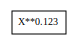

#### Counts totals:
 - `X**0.123`: 1

In [21]:
from qualtran.resource_counting.generalizers import ignore_split_join
x_pow_g, x_pow_sigma = x_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(x_pow_g)
show_counts_sigma(x_pow_sigma)

## `YPowGate`
A gate that rotates around the Y axis of the Bloch sphere.

The unitary matrix of `YPowGate(exponent=t)` is:
$$
    \begin{bmatrix}
        e^{i \pi t /2} \cos(\pi t /2) & - e^{i \pi t /2} \sin(\pi t /2) \\
        e^{i \pi t /2} \sin(\pi t /2) & e^{i \pi t /2} \cos(\pi t /2)
    \end{bmatrix}
$$

Note in particular that this gate has a global phase factor of
$e^{i \pi t / 2}$ vs the traditionally defined rotation matrices
about the Pauli Y axis. See `Ry` for rotations without the global
phase. The global phase factor can be adjusted by using the `global_shift`
parameter when initializing.

#### Parameters
 - `exponent`: The t in gate**t. Determines how much the eigenvalues of the gate are phased by. For example, eigenvectors phased by -1 when `gate**1` is applied will gain a relative phase of e^{i pi exponent} when `gate**exponent` is applied (relative to eigenvectors unaffected by `gate**1`). 
 - `global_shift`: Offsets the eigenvalues of the gate at exponent=1. In effect, this controls a global phase factor on the gate's unitary matrix. The factor for global_shift=s is:     exp(i * pi * s * t)
 - `eps`: precision for implementation of rotation. 

#### Registers
 - `q`: One-bit register. 

#### References
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Offers a small improvement
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf). 


In [22]:
from qualtran.bloqs.basic_gates import YPowGate

### Example Instances

In [23]:
y_pow = YPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [24]:
from qualtran.drawing import show_bloqs
show_bloqs([y_pow],
           ['`y_pow`'])

### Call Graph

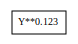

#### Counts totals:
 - `Y**0.123`: 1

In [25]:
from qualtran.resource_counting.generalizers import ignore_split_join
y_pow_g, y_pow_sigma = y_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(y_pow_g)
show_counts_sigma(y_pow_sigma)